In [ ]:
#LOAD CSV FILE (TEST DATASET)
import pandas as pd
data=pd.read_csv('Test.csv')
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB
None
       Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year
count  4705.000000  

In [26]:
#DATA CLEANING
data['Item_Weight'] = data['Item_Weight'].fillna(data['Item_Weight'].mean())
data['Outlet_Size'] = data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0])

In [27]:
#FEATURE ENCODING
data['outlet_Age']=2025 - data['Outlet_Establishment_Year']
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                5681 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                5681 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
 11  outlet_Age                 5681 non-null   int64  
dtypes: float64(3), int64(2), object(7)
memory usage: 532.7+ KB
None


In [ ]:
#LOAD TRAINING DATASET
data1=pd.read_csv('Train.csv')

In [30]:
print(data1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None


In [32]:
import numpy as np
if 'Item_Outlet_Sales' in data1.columns:
    data1['Item_Outlet_Sales_Log'] = np.log1p(data1['Item_Outlet_Sales'])
else:
    print("Column 'Item_Outlet_Sales' not found. Are you using the test set?")

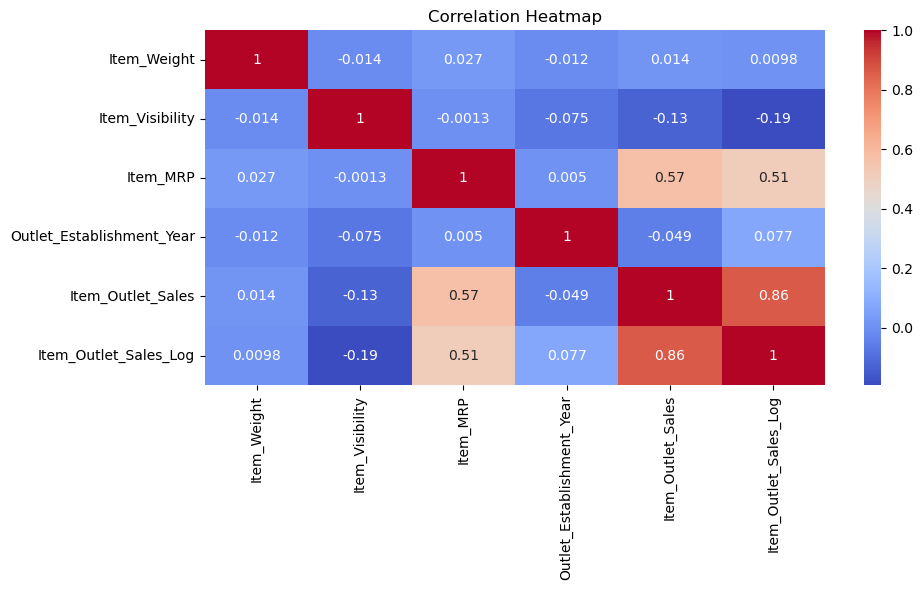

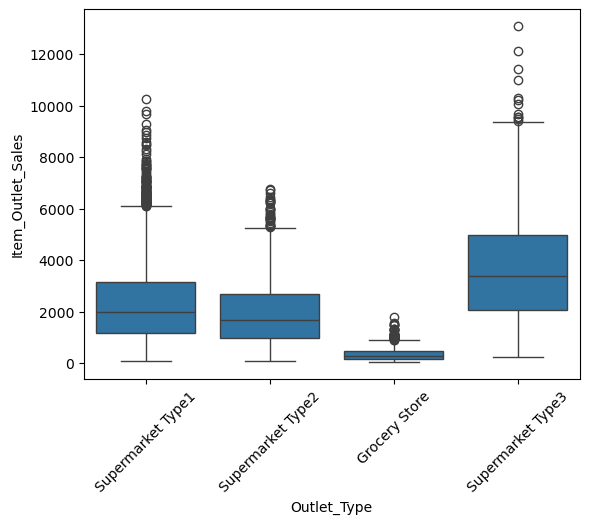

In [35]:
#EDA
import matplotlib.pyplot as plt
import seaborn as sns

#correlation heatmap
numeric_data = data1.select_dtypes(include=[np.number])
plt.figure(figsize=(10,6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

#Boxplot:Sales vs Outlet_Type
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=data1)
plt.xticks(rotation=45)
plt.show()

In [36]:
#ENCODING AND SCALING
from sklearn.preprocessing import LabelEncoder

#label encoding
le = LabelEncoder()
data1['Outlet']=le.fit_transform(data1['Outlet_Identifier'])

#One hot encoding
data1 = pd.get_dummies(data1, columns=['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'], drop_first=True)



In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'outlet_Age']] = scaler.fit_transform(
    data[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'outlet_Age']]
)

In [48]:
#MODEL BUILDING
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Features and target
X = data1.drop(['Item_Outlet_Sales', 'Item_Outlet_Sales_Log', 'Item_Identifier', 'Outlet_Identifier'], axis=1)
y = data1['Item_Outlet_Sales']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

In [49]:
#EVALUATION
r2 = r2_score(y_test, y_pred)
rmse=np.sqrt(mean_squared_error(y_test, y_pred))
print(f'R^2 Score: {r2}')
print(f'RMSE: {rmse}')

R^2 Score: 0.5567933983891344
RMSE: 1097.55285818281


BUSINESS STRATEGY INSIGHTS
*PRICE OPTIMIZATION: focus on pricing strategies for high-MRP items.

*OUTLET PLANNING: invest in outlet types with higher predicted sales(e.g,Supermarket Type 3).

*INVENTORY STRATEGY: stock more of high-performing item categories.

*NEW OUTLET FORECASTING: use model predictions to estimate first-year sales based on outlet features.